# Team ID:PNT2022TMID33022
project name:Predicting the energy output of wind turbine 
based on weather condition

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
data = pd.read_csv("Wind turbine.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
data.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


<AxesSubplot:>

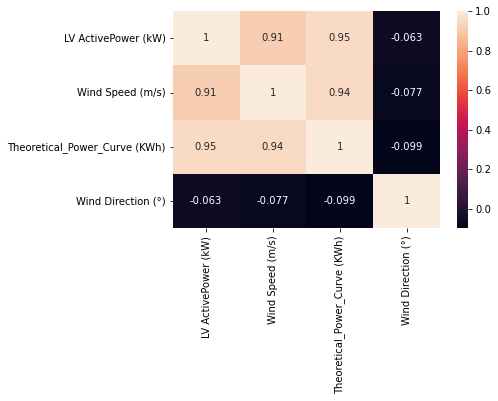

In [6]:
sns.heatmap(data.corr(),annot=True)

# Handling the null values

In [7]:
data.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

<AxesSubplot:>

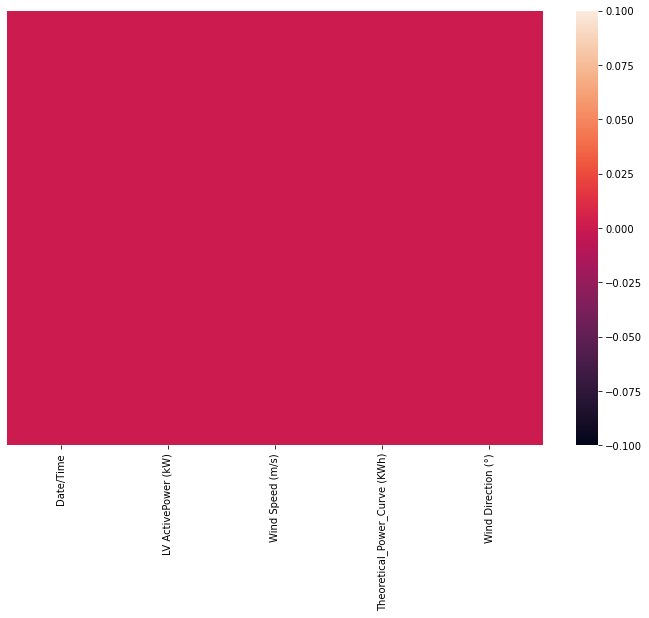

In [8]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),yticklabels=False)

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LV ActivePower (kW),50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
Wind Speed (m/s),50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
Theoretical_Power_Curve (KWh),50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
Wind Direction (°),50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


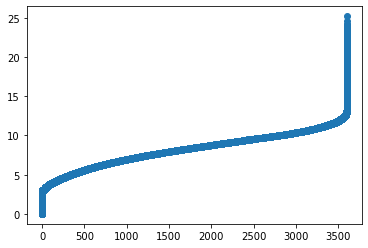

In [59]:
plt.scatter(data['Theoretical_Power_Curve (KWh)'],data['Wind Speed (m/s)'])

# Independent and Dependent variables

In [9]:
x=data.drop(columns=['LV ActivePower (kW)'])

y=data['LV ActivePower (kW)']

In [46]:
x=data.drop(columns=['LV ActivePower (kW)']).values

In [49]:
x

array([['01 01 2018 00:00', 5.31133604049682, 416.328907824861,
        259.994903564453],
       ['01 01 2018 00:10', 5.67216682434082, 519.917511061494,
        268.64111328125],
       ['01 01 2018 00:20', 5.21603679656982, 390.900015810951,
        272.564788818359],
       ...,
       ['31 12 2018 23:30', 8.43535804748535, 1788.28475526396,
        84.7425003051757],
       ['31 12 2018 23:40', 9.42136573791503, 2418.38250336009,
        84.2979125976562],
       ['31 12 2018 23:50', 9.97933197021484, 2779.18409628274,
        82.2746200561523]], dtype=object)

In [47]:
y=data['LV ActivePower (kW)'].values

In [48]:
y

array([ 380.04779053,  453.76919556,  306.37658691, ..., 2201.10693359,
       2515.6940918 , 2820.46606445])

# Splitting train and test sets

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [53]:
x_train

array([['29 03 2018 18:20', 2.73557209968566, 0.0, 56.0006790161132],
       ['07 06 2018 06:40', 2.67128205299377, 0.0, 75.3785171508789],
       ['20 10 2018 12:00', 3.41321802139282, 42.8829073408742,
        14.6807498931884],
       ...,
       ['30 03 2018 15:50', 2.84113001823425, 0.0, 228.681900024414],
       ['13 04 2018 18:00', 3.72345304489135, 81.0212420895296,
        50.4966316223144],
       ['04 10 2018 22:40', 11.0031900405883, 3273.56713884374,
        52.1219902038574]], dtype=object)

In [55]:
y_train

array([  29.8223896 ,    0.        ,   45.25106049, ...,    0.        ,
         53.6293602 , 2806.25      ])

In [56]:
x_test

array([['21 10 2018 11:30', 5.89308595657348, 589.509973705867,
        28.491750717163],
       ['07 02 2018 07:10', 5.25200796127319, 400.408306436924,
        131.36880493164],
       ['14 11 2018 16:10', 5.3863821029663, 436.901697458568,
        33.8353385925292],
       ...,
       ['08 01 2018 19:10', 6.66071510314941, 870.305241279626,
        219.86180114746],
       ['04 04 2018 09:50', 1.9609990119934, 0.0, 14.1540899276733],
       ['30 01 2018 16:50', 13.8598098754882, 3600.0, 0.0]], dtype=object)

In [57]:
y_test

array([505.74609375, 357.5486145 ,   0.        , ..., 757.28381348,
         0.        ,   0.        ])